# Módulo Visualização de Dados:

Leia o arquivo ecommerce_preparados.csv’ dentro de um dataframe  

Faça uma análise detalhada dos dados, descubra quais dados gostaria de destacar e crie os seguintes gráficos:


*   1 Gráfico de dispersão
*   1 Mapa de calor
*   1 Gráfico de barra
*   1 Gráfico de pizza
*   1 Gráfico de densidade

Adicione títulos nos gráficos e nos eixos para ficar claro os objetivos dos gráficos.

Fiquem a vontade para escolher a biblioteca que quiserem, não esqueçam de comentar os códigos.

Essa atividade é um pouco diferente, vocês terão que construir os códigos nesse arquivo e enviar ou o arquivo ou o link do github com o arquivo publicado para os tutores.

In [1]:

#Importar Biblioteas
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Importar Dados
df = pd.read_csv('ecommerce_preparados.csv')

   Unnamed: 0                                                        Título  Nota  N_Avaliações  Desconto                            Marca   Material      Gênero        Temporada                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Review1                                                                                                                                                                                                                                                                                                                                        

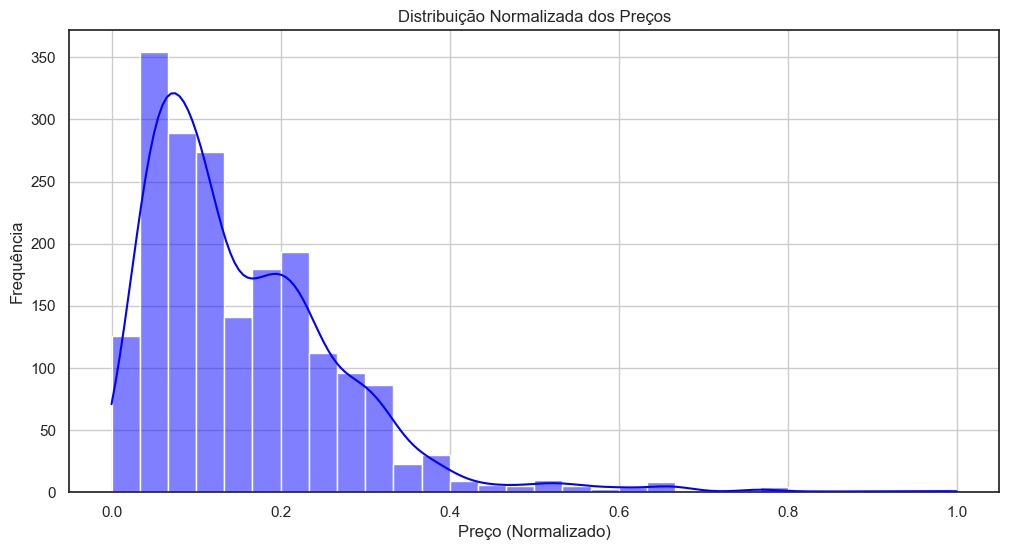

In [2]:
#Configurações de exibição do Pandas

pd.set_option('display.max_columns', None)  # Mostrar todas as colunas
pd.set_option('display.max_rows', None)     # Mostrar todas as linhas
pd.set_option('display.width', None)        # Ajustar largura da exibição
pd.set_option('display.max_colwidth', None) # Mostrar largura total das colunas

#Exibir as primeiras linhas do DataFrame e suas informações
print(df.head().to_string())
print(df.tail().to_string())
print(f'\nVerificação Inicial:\n{df.info()}')

#verificar se há valores nulos
print(f'Valores nulos:\n{df.isnull().sum()}')
print('\nPorcentagem(%) Dados nulos:\n',df.isnull().mean() * 100 )
#verificar se há valores duplicados
print(f'Valores duplicados: {df.duplicated().sum()}')

#Criando Função para analisar os dados normalizados e padronizados

def analizar_colunas(coluna):
    print(f'\nAnalisando Coluna: {coluna}\n')
    print("Mínimo:", df[coluna].min())
    print("Máximo:", df[coluna].max())
    print("Média :", df[coluna].mean())
    print("Desvio padrão:", df[coluna].std())
    print("Valores únicos:", df[coluna].nunique())
    if df[coluna].dtype == 'object':
        print(df[coluna].value_counts())

#Analisando as colunas normalizadas e padronizadas
analizar_colunas('Nota_MinMax')
analizar_colunas('N_Avaliações_MinMax')
analizar_colunas('Desconto_MinMax')
analizar_colunas('Preço_MinMax')

sns.set_theme(style="white", palette="pastel")


# Criar graficos

plt.figure(figsize=(12, 6))
sns.histplot(df['Preço_MinMax'], bins=30, kde=True, color='blue')
plt.title('Distribuição Normalizada dos Preços')
plt.xlabel('Preço (Normalizado)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()




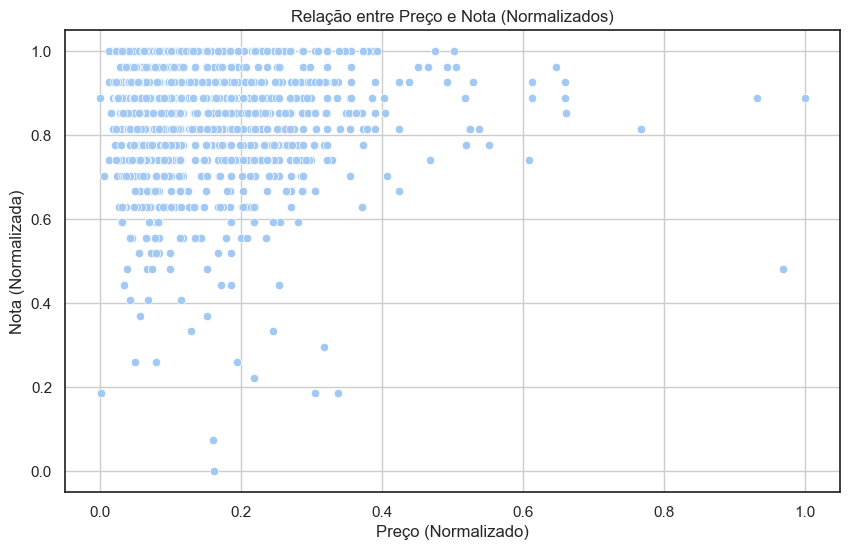

In [3]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Preço_MinMax', y='Nota_MinMax', data=df)
plt.title('Relação entre Preço e Nota (Normalizados)')
plt.xlabel('Preço (Normalizado)')
plt.ylabel('Nota (Normalizada)')
plt.grid(True)
plt.show()



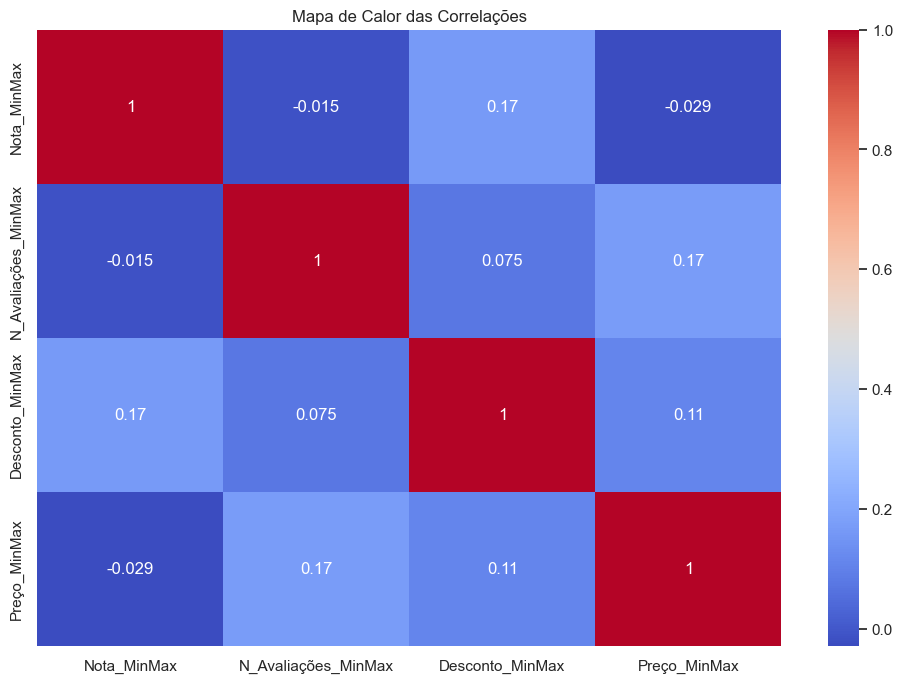

In [4]:
plt.figure(figsize=(12,8))
sns.heatmap(df[['Nota_MinMax','N_Avaliações_MinMax','Desconto_MinMax','Preço_MinMax']].corr(), 
            annot=True, cmap='coolwarm')
plt.title('Mapa de Calor das Correlações')
plt.show()



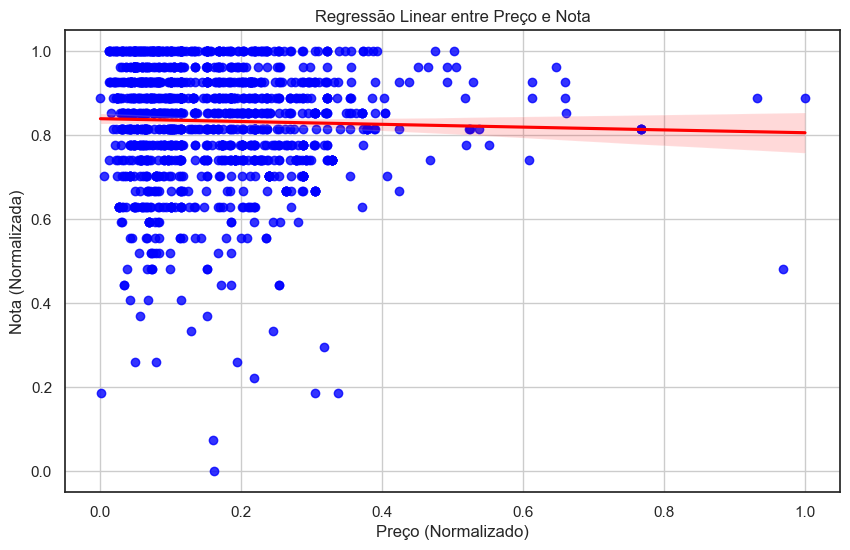

In [5]:
plt.figure(figsize=(10,6))
sns.regplot(x='Preço_MinMax', y='Nota_MinMax', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Regressão Linear entre Preço e Nota')
plt.xlabel('Preço (Normalizado)')
plt.ylabel('Nota (Normalizada)')
plt.grid(True)
plt.show()



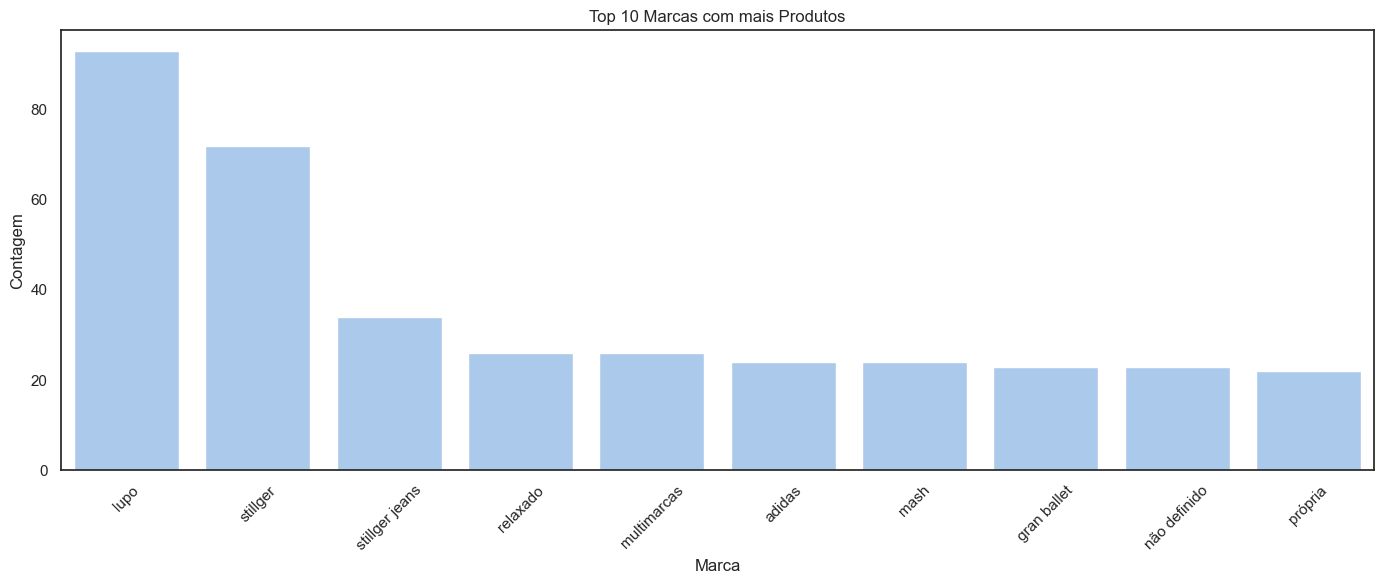

In [6]:
plt.figure(figsize=(14,6))
sns.countplot(x='Marca', data=df, order=df['Marca'].value_counts().index[:10])
plt.title('Top 10 Marcas com mais Produtos')
plt.xlabel('Marca')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



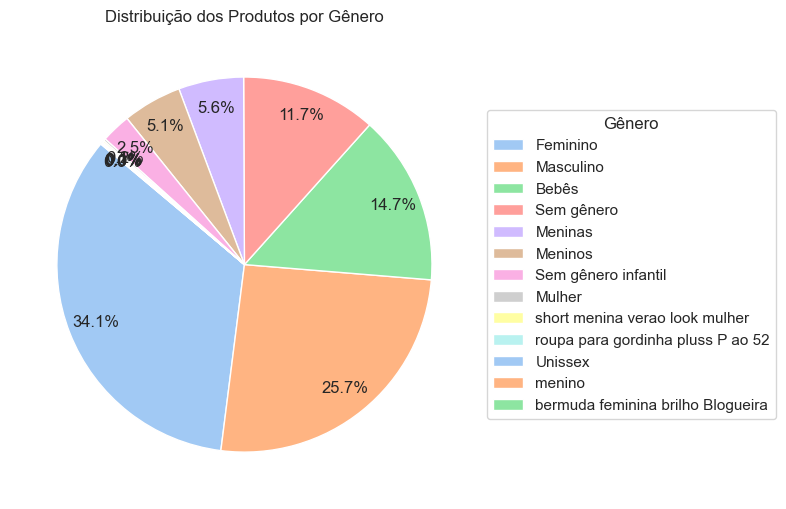

In [7]:
genre_counts = df['Gênero'].value_counts()
labels = genre_counts.index
sizes = genre_counts.values

plt.figure(figsize=(8, 8))

# Create the pie chart
wedges, texts, autotexts = plt.pie(sizes, autopct='%1.1f%%', startangle=140, pctdistance=0.85)

# Add a title
plt.title('Distribuição dos Produtos por Gênero')

# Create the legend separately
plt.legend(wedges, labels, title="Gênero", loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_16244\874638412.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['N_Avaliações_MinMax'], shade=True, color='purple')


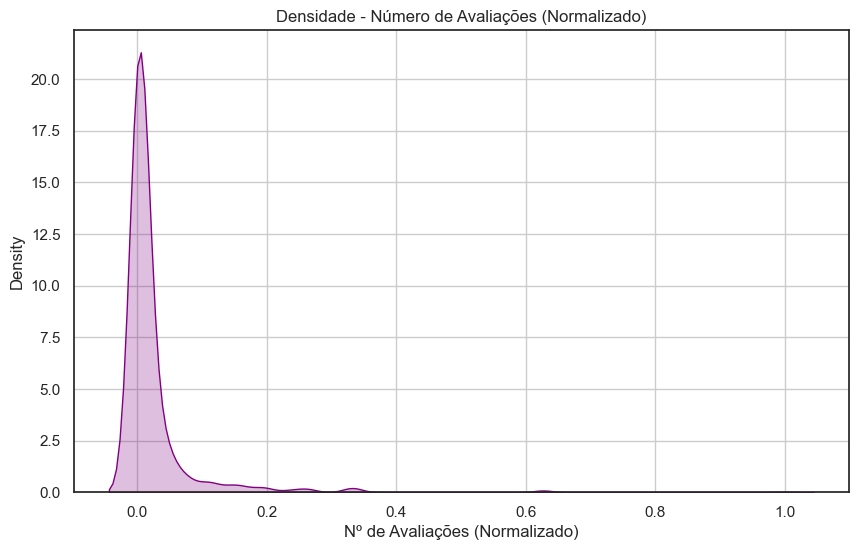

In [8]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['N_Avaliações_MinMax'], shade=True, color='purple')
plt.title('Densidade - Número de Avaliações (Normalizado)')
plt.xlabel('Nº de Avaliações (Normalizado)')
plt.grid(True)
plt.show()